### Schemdraw Test Cases
In addition to running the documentation/gallery examples, this notebook provides some extra test cases to verify functionality.

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
#%config InlineBackend.figure_format = 'svg'

In [2]:
import matplotlib as mpl

import schemdraw
from schemdraw import elements as e
from schemdraw import logic as l
print(schemdraw.__version__)

#import SchemDraw  # Backwards compatibility with camelcase import...

0.7a2


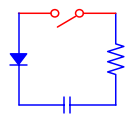

In [3]:
# Test directions. Should form square. Blue as default color.
d = schemdraw.Drawing(color='blue', lw=1.5)
d.add( e.CAP, d='right' )
d.add( e.RES, d='up' )
d.add( e.SWITCH_SPST, d='l', color='red' )
d.add( e.DIODE_F, d='d' )
d.draw()


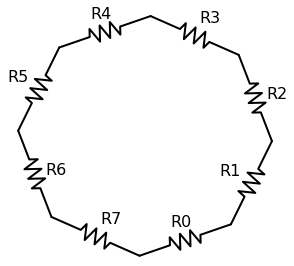

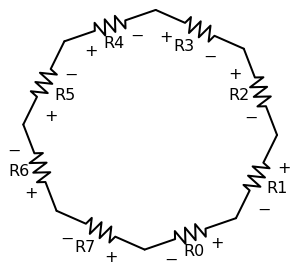

In [4]:
# Test label positioning & rotations/theta
d = schemdraw.Drawing()
for i in range(8):
    d.add(e.RES, label='R%d'%i, theta=45*i+20 )
display(d.draw())

d = schemdraw.Drawing()
for i in range(8):
    d.add(e.RES, botlabel=['$-$','R%d'%i,'+'], theta=45*i+20 )  # put the - sign in LaTeX/math mode so it's not a hyphen.
display(d.draw())


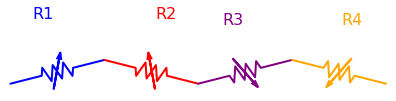

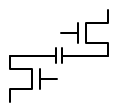

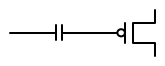

In [5]:
# Reverse and Flip, Colors
d = schemdraw.Drawing()
d.add(e.RES_VAR, label='R1', theta=15, reverse=False, color='blue', lblofst=1. )
d.add(e.RES_VAR, label='R2', theta=-15, reverse=True, color='red', lblofst=1. )
d.add(e.RES_VAR, label='R3', theta=15, flip=True, color='purple', lblofst=1. )
d.add(e.RES_VAR, label='R4', theta=-15, flip=True, reverse=True, color='orange', lblofst=1. )
display(d.draw())

# Reverse/flip 3-terminal
d = schemdraw.Drawing()
f = d.add(e.NFET, reverse=False)
d.add(e.CAP, xy=f.drain)
f = d.add(e.NFET, reverse=True, anchor='source')
display(d.draw())

d = schemdraw.Drawing(inches_per_unit=.5)
c = d.add( e.CAP )
f = d.add( e.PFET, anchor='gate', reverse=True )
display(d.draw())

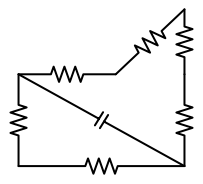

In [6]:
# to, tox, toy, endpts
# Should be closed loop with cap along diagonal.
d = schemdraw.Drawing()
R1 = d.add(e.RES)
R2 = d.add(e.RES, theta=45)
R3 = d.add(e.RES, d='down', toy=R1.end)
R4 = d.add(e.RES, d='down')
R5 = d.add(e.RES, d='left', tox = R1.start)
R6 = d.add(e.RES, endpts=[R5.end,R1.start])
C  = d.add(e.CAP, to=R4.end)
d.draw()

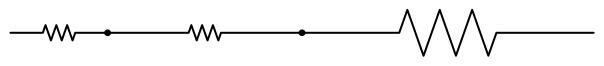

In [7]:
# length, xoom
d = schemdraw.Drawing()
d.add( e.RES )
d.add( e.DOT )
d.add( e.RES, l=6 )
d.add( e.DOT )
d.add( e.RES, zoom=3 )
d.draw()

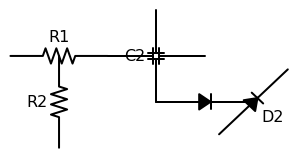

In [8]:
# Anchor Test
# R2 should start at the center of R1
# Capacitors have center at same point
# Tilted diode is centered on end of straight diode

d = schemdraw.Drawing(inches_per_unit=.5)
R1 = d.add( e.RES, label='R1')
R2 = d.add( e.RES, d='down', xy=R1.center, label='R2')

C1 = d.add( e.CAP, d='right', xy=R1.end)
C2 = d.add( e.CAP, d='down', anchor='center', xy=C1.center, label='C2')

D1 = d.add( e.DIODE_F, d='right')
D2 = d.add( e.DIODE_F, theta=45, anchor='center', xy=D1.end, botlabel='D2')

d.draw()

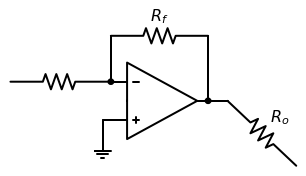

In [9]:
# Opamp, opamp anchor points
d = schemdraw.Drawing(inches_per_unit=.5)
op = d.add( e.OPAMP )
d.add( e.LINE, d='left', xy=op.in1, l=d.unit/6 )
d.add( e.DOT )
d.add( e.LINE, d='up', l=d.unit/2 )
Rf = d.add( e.RES,  d='right', l=d.unit*1, label='$R_f$' )

ee = d.add( e.LINE, d='down', toy=op.out )
ll = d.add( e.LINE, d='left', tox=op.out )
d.add( e.DOT, xy=ll.start )
out = d.add( e.LINE, d='right', l=d.unit/5 )

Rf = d.add( e.RES, theta=-45, label='$R_o$' )
Rin = d.add( e.RES, d='left', xy=op.in1-[d.unit/5,0])
d.add( e.LINE, d='left', xy=op.in2, l=d.unit/4 )
d.add( e.LINE, d='down', l=d.unit/5 )
d.add( e.GND )
d.draw()

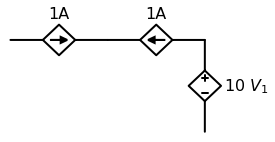

In [10]:
# Dependent sources
d = schemdraw.Drawing()
v = d.add( e.SOURCE_CONT_V, botlabel='10 $V_1$' )
i = d.add( e.SOURCE_CONT_I, d='left', toplabel='1A')
i2 = d.add( e.SOURCE_CONT_I, d='left', reverse=True, toplabel='1A')
d.draw()


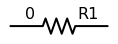

In [11]:
# Label location, adding labels after adding element
d = schemdraw.Drawing()
R = d.add( e.RES, label='R1', lblloc='center', lblofst=[.9,.4])
R.add_label( '0', loc='center', ofst=[-.9,.4] )
d.draw()

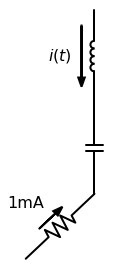

In [12]:
# Test current label arrows, reversing, length
# The 1mA current arrow should be same length as resistor, pointing up/right
# The i(t) arrow should point down (reverse of inductor 'up' direction)
d = schemdraw.Drawing()
theta = 45
R = d.add( e.RES, theta=theta)
d.labelI( R, label='1mA', top=True, arrowlen=1 )
d.add( e.CAP, d='up')
I1 = d.add( e.INDUCTOR )
d.labelI( I1, label='$i(t)$', top=True, reverse=True )
d.draw()


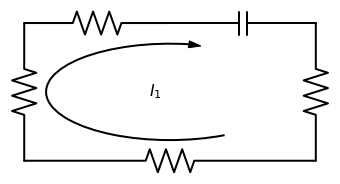

In [13]:
# Test loop current label
d = schemdraw.Drawing(inches_per_unit=.75)
R1 = d.add( e.RES )
C = d.add( e.CAP )
R2 = d.add( e.RES, d='down')
R3 = d.add( e.RES, d='left', tox=R1.start)
R4 = d.add( e.RES, d='up' )
L = d.loopI( [R1, R2, R3, R4], d='cw', label='$I_1$', theta1=70, theta2=-40 )
d.draw(showframe=False)


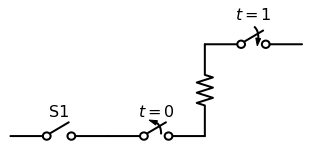

In [14]:
# Switches
d = schemdraw.Drawing()
d.add( e.SWITCH_SPST, label='S1')
d.add( e.SWITCH_SPST_OPEN, label='$t=0$')
d.add( e.RES,d='up')
d.add( e.SWITCH_SPST_CLOSE, label='$t=1$', d='right')
d.draw()

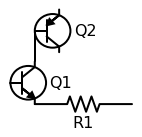

In [15]:
# BJT's
d = schemdraw.Drawing()
Q1 = d.add( e.BJT_NPN_C, rgtlabel='Q1')
d.add( e.LINE, d='up', l=1)
Q2 = d.add( e.BJT_PNP_C, d='right', rgtlabel='Q2')

d.add( e.RES, xy=Q1.emitter, botlabel='R1')
d.draw()


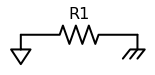

In [16]:
# Test grounds
d = schemdraw.Drawing(inches_per_unit=.6)
d.add( e.GND_SIG )
d.add( e.RES, label='R1')
d.add( e.GND_CHASSIS )
d.draw()

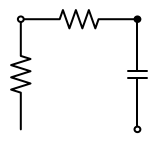

In [17]:
# Open and closed dots
d = schemdraw.Drawing(inches_per_unit=.6)
d.add( e.RES, d='up')
d.add( e.DOT_OPEN )
d.add( e.RES, d='right')
d.add( e.DOT )
d.add( e.CAP,d='down')
d.add( e.DOT_OPEN )

d.draw()

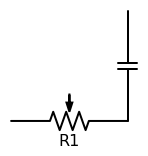

In [18]:
# pot
d = schemdraw.Drawing(inches_per_unit=.6)
d.add(e.POT, label='R1')
d.add( e.CAP,d='up')
d.draw()

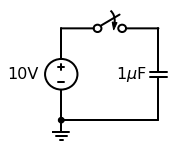

In [19]:
# Looks like a homework problem
d = schemdraw.Drawing()
G = d.add( e.GND )
d.add( e.SOURCE_V, d='up', toplabel='10V', lblofst=.2)
S1 = d.add( e.SWITCH_SPST_CLOSE, d='right' )
d.add( e.CAP, d='down', label='1$\mu$F' )
d.add( e.LINE, d='left', tox=G.xy )
d.add( e.DOT )
d.draw(showframe=False)


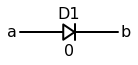

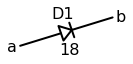

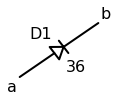

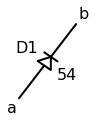

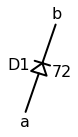

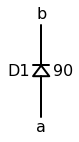

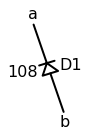

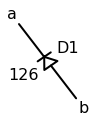

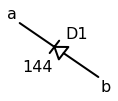

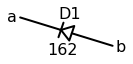

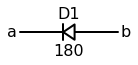

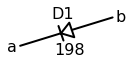

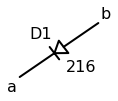

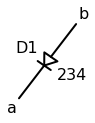

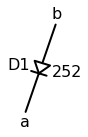

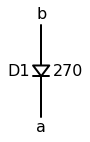

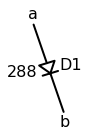

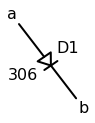

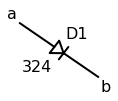

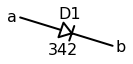

In [20]:
# Label offsets/rotations
div = 20
for i in range(div):
    th = (360./div) * i
    d = schemdraw.Drawing()
    R1 = d.add(e.DIODE, theta=th, label='D1' )
    R1.add_label( '%.0f'%th, loc='bot' )
    R1.add_label( 'a', loc='lft' )
    R1.add_label( 'b', loc='rgt' )
    display(d.draw())
    

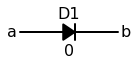

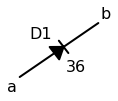

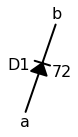

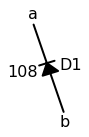

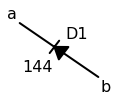

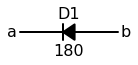

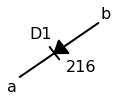

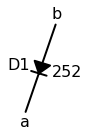

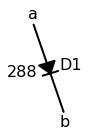

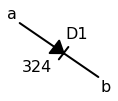

In [21]:
# Label offsets/rotations - with flip
div = 10
for i in range(div):
    th = (360./div) * i
    d = schemdraw.Drawing()
    R1 = d.add(e.DIODE_F, theta=th, flip=True )
    R1.add_label( 'D1', loc='top' )
    R1.add_label( '%.0f'%th, loc='bot' )
    R1.add_label( 'a', loc='lft' )
    R1.add_label( 'b', loc='rgt' )
    display(d.draw())
    

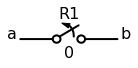

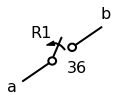

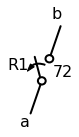

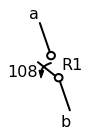

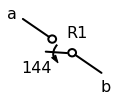

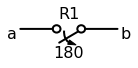

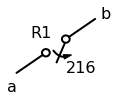

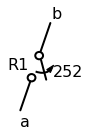

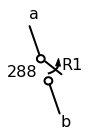

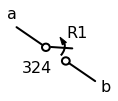

In [22]:
# Label offsets/rotations - with reverse
mpl.rcParams['font.size'] = 8

div = 10
for i in range(div):
    th = (360./div) * i
    d = schemdraw.Drawing()
    R1 = d.add(e.SWITCH_SPST_OPEN, theta=th, reverse=False )
    R1.add_label( 'R1', loc='top' )
    R1.add_label( '%.0f'%th, loc='bot' )
    R1.add_label( 'a', loc='lft' )
    R1.add_label( 'b', loc='rgt' )
    display(d.draw())
    

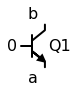

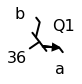

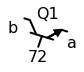

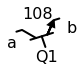

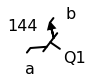

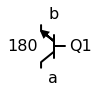

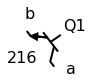

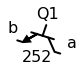

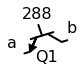

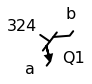

In [23]:
# Label offsets/rotations - BJT
mpl.rcParams['font.size'] = 8

div = 10
for i in range(div):
    th = (360./div) * i
    d = schemdraw.Drawing()
    R1 = d.add(e.BJT_NPN, theta=th )
    R1.add_label( 'Q1', loc='rgt' )
    R1.add_label( '%.0f'%th, loc='lft' )
    R1.add_label( 'a', loc='bot' )
    R1.add_label( 'b', loc='top' )
    display(d.draw())
    

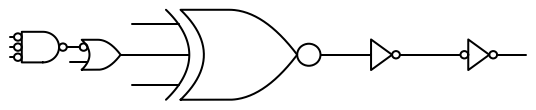

In [24]:
# Logic gates, zoom
d = schemdraw.Drawing()
d.add(l.andgate(inputs=3, nand=True, inputnots=[1,2,3]))
d.add(l.orgate(inputs=2, inputnots=[1], anchor='in1'))
d.add(l.orgate(inputs=3, xor=True, nor=True, zoom=3))
d.add(l.NOT)
d.add(l.NOTNOT)
d.draw()

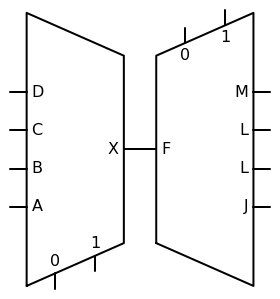

In [25]:
# Multiplexer/demultiplexer
d = schemdraw.Drawing()
M1 = d.add(e.multiplexer({'name':'A','side':'L'}, {'name':'B','side':'L'},
                         {'name':'C','side':'L'}, {'name':'D','side':'L'},
                         {'name':'X','side':'R'}, {'name':'0','side':'B'},
                         {'name':'1','side':'B'}))
M2 = d.add(e.multiplexer({'name': 'F', 'side': 'L'},
                 {'name': 'J', 'side': 'R'}, {'name': 'L', 'side': 'R'},
                 {'name': 'L', 'side': 'R'}, {'name': 'M', 'side': 'R'},
                 {'name': '0', 'side': 'T'}, {'name': '1', 'side': 'T'},
                 demux=True, xy=M1.X, anchor='F'))
                 
d.draw()

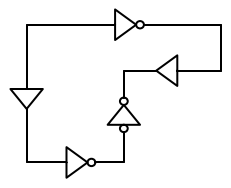

In [26]:
# Test lead extension of single input/output logic gates
d = schemdraw.Drawing()
n = d.add(l.NOT)
d.add(l.NOTNOT, d='up')
d.add(l.BUF, d='right', reverse=True)
d.add(e.LINE, d='up', l=d.unit/2)
d.add(l.NOT, d='left', tox=n.start, reverse=True)
d.add(l.BUF, d='down', toy=n.start)
d.draw()

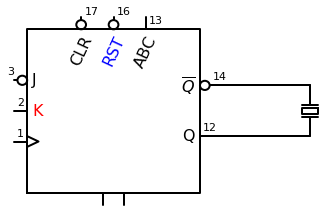

In [27]:
# Test various aspects of ic() function
# including labels, pin labels, colors, fontsizes, invertbubbles, and anchors
ic = e.legacy.ic(
      {'name': '>', 'pin': '1', 'side': 'left'},
      {'name': 'K', 'pin': '2', 'side': 'left', 'size': 10, 'color': 'red'},
      {'name': 'J', 'pin': '3', 'side': 'left', 'invert': True},
      {'name': 'Q', 'pin': '12', 'side': 'right'},
      {'name': '$\overline{Q}$', 'pin': '14', 'side': 'right', 'invert': True, 'anchorname': 'QBAR'},
      {'name': 'RST', 'pin': '16', 'side': 'top', 'slot': '2/3', 'rotation':65, 'invert': True, 'color': 'blue'},
      {'name': 'CLR', 'pin': '17', 'side': 'top', 'slot': '1/3', 'rotation':65, 'invert': True},
      {'name': 'ABC', 'pin': '13', 'side': 'top', 'slot': '3/3', 'rotation':65, 'invert': False},
      {'side': 'bot', 'pos': .6},
      {'side': 'bot', 'pos': .4},
edgepadH = 1,
edgepadW = 1,
    leadlen=.4,
    slant=0,
    pinspacing=1
      )

d = schemdraw.Drawing()
I = d.add(ic)
d.add(e.LINE, d='right', xy=I.QBAR)
d.add(e.XTAL, d='down', toy=I.Q)
d.add(e.LINE, d='left', tox=I.Q)
d.draw()

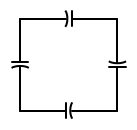

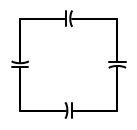

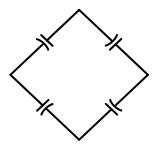

In [28]:
# Check arc drawing that broke with matplotlib 2.2
d = schemdraw.Drawing()
d.add(e.CAP2)
d.add(e.CAP2, d='up')
d.add(e.CAP2, d='left')
d.add(e.CAP2, d='down')
display(d.draw())

d = schemdraw.Drawing()
d.add(e.CAP2, reverse=True)
d.add(e.CAP2, d='up', reverse=True)
d.add(e.CAP2, d='left', reverse=True)
d.add(e.CAP2, d='down', reverse=True)
display(d.draw())

d = schemdraw.Drawing()
d.add(e.CAP2, theta=45)
d.add(e.CAP2, theta=135)
d.add(e.CAP2, theta=225)
d.add(e.CAP2, theta=-45)
display(d.draw())

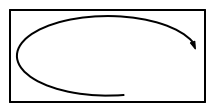

In [29]:
# Make sure arrow head is in correct place
d = schemdraw.Drawing()
L1 = d.add(e.LINE, l=d.unit*2)
L2 = d.add(e.LINE, d='down')
L3 = d.add( e.LINE, d='left', tox=L1.start)
L4 = d.add( e.LINE, d='up' )
d.loopI([L1, L2, L3, L4], d='cw', theta1=10, theta2=292 )
d.draw()

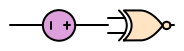

In [30]:
# Fill on paths (like the gate) and shapes (like the source)
d = schemdraw.Drawing()
d.add(e.SOURCE_V, fill='plum', d='right')
d.add(l.XNOR2, fill='bisque')
d.draw()

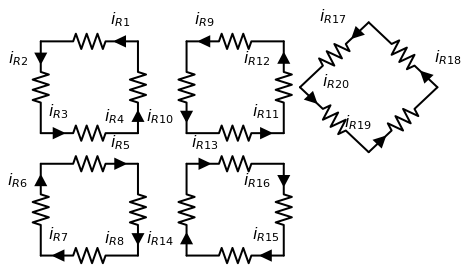

In [31]:
# Inline current arrows
d = schemdraw.Drawing()
R1 = d.add(e.RES, d='left')
R2 = d.add(e.RES, d='down')
R3 = d.add(e.RES, d='right')
R4 = d.add(e.RES, d='up')
d.labelI_inline(R1, label='$i_{R1}$')
d.labelI_inline(R2, label='$i_{R2}$')
d.labelI_inline(R3, label='$i_{R3}$')
d.labelI_inline(R4, label='$i_{R4}$')

R5 = d.add(e.RES, d='left', xy=[0, -4])
R6 = d.add(e.RES, d='down')
R7 = d.add(e.RES, d='right')
R8 = d.add(e.RES, d='up')
d.labelI_inline(R5, label='$i_{R5}$', d='out')
d.labelI_inline(R6, label='$i_{R6}$', d='out')
d.labelI_inline(R7, label='$i_{R7}$', d='out')
d.labelI_inline(R8, label='$i_{R8}$', d='out')

R9 = d.add(e.RES, d='left', xy=[4.5, 0])
R10 = d.add(e.RES, d='down')
R11 = d.add(e.RES, d='right')
R12 = d.add(e.RES, d='up')
d.labelI_inline(R9, label='$i_{R9}$', start=False, d='out')
d.labelI_inline(R10, label='$i_{R10}$', start=False, d='out')
d.labelI_inline(R11, label='$i_{R11}$', start=False, d='out')
d.labelI_inline(R12, label='$i_{R12}$', start=False, d='out')

R13 = d.add(e.RES, d='left', xy=[4.5, -4])
R14 = d.add(e.RES, d='down')
R15 = d.add(e.RES, d='right')
R16 = d.add(e.RES, d='up')
d.labelI_inline(R13, label='$i_{R13}$', start=False, d='in')
d.labelI_inline(R14, label='$i_{R14}$', start=False, d='in')
d.labelI_inline(R15, label='$i_{R15}$', start=False, d='in')
d.labelI_inline(R16, label='$i_{R16}$', start=False, d='in')

R17 = d.add(e.RES, theta=45, xy=[5, -1.5])
R18 = d.add(e.RES, theta=-45)
R19 = d.add(e.RES, theta=-135)
R20 = d.add(e.RES, theta=-225)
d.labelI_inline(R17, label='$i_{R17}$', start=False, d='in')
d.labelI_inline(R18, label='$i_{R18}$', start=False, d='in')
d.labelI_inline(R19, label='$i_{R19}$', start=False, d='in')
d.labelI_inline(R20, label='$i_{R20}$', start=False, d='in')

d.draw()


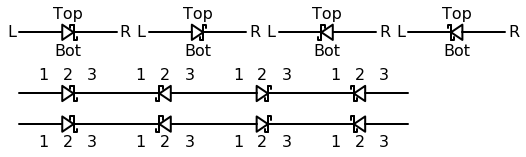

In [32]:
# Check that labels are drawn on the correct side
# with correct alignment
d = schemdraw.Drawing()
d.add(e.SCHOTTKY, label='Top', botlabel='Bot', lftlabel='L', rgtlabel='R')
d.add(e.SCHOTTKY, xy=[4,0], flip=True, label='Top', botlabel='Bot', lftlabel='L', rgtlabel='R')
d.add(e.SCHOTTKY, xy=[8,0], reverse=True, label='Top', botlabel='Bot', lftlabel='L', rgtlabel='R')
d.add(e.SCHOTTKY, xy=[12,0], flip=True, reverse=True, label='Top', botlabel='Bot', lftlabel='L', rgtlabel='R')
d.here = [0, -2]
d.add(e.SCHOTTKY, label=['1', '2', '3'])
d.add(e.SCHOTTKY, reverse='True', label=['1', '2', '3'])
d.add(e.SCHOTTKY, flip=True, label=['1', '2', '3'])
d.add(e.SCHOTTKY, flip=True, reverse='True', label=['1', '2', '3'])
d.here = [0, -3]
d.add(e.SCHOTTKY, botlabel=['1', '2', '3'])
d.add(e.SCHOTTKY, reverse='True', botlabel=['1', '2', '3'])
d.add(e.SCHOTTKY, flip=True, botlabel=['1', '2', '3'])
d.add(e.SCHOTTKY, flip=True, reverse='True', botlabel=['1', '2', '3'])
d.draw()

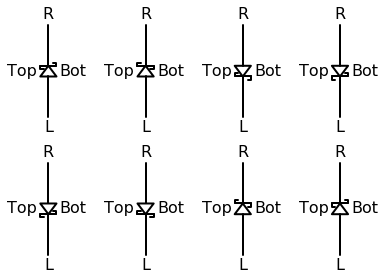

In [33]:
d = schemdraw.Drawing()
d.add(e.SCHOTTKY, d='up', label='Top', botlabel='Bot', lftlabel='L', rgtlabel='R')
d.add(e.SCHOTTKY, d='up', xy=[3,0], flip=True, label='Top', botlabel='Bot', lftlabel='L', rgtlabel='R')
d.add(e.SCHOTTKY, d='up', xy=[6,0], reverse=True, label='Top', botlabel='Bot', lftlabel='L', rgtlabel='R')
d.add(e.SCHOTTKY, d='up', xy=[9,0], flip=True, reverse=True, label='Top', botlabel='Bot', lftlabel='L', rgtlabel='R')

d.add(e.SCHOTTKY, d='down', xy=[0,-1.5], label='Top', botlabel='Bot', lftlabel='L', rgtlabel='R')
d.add(e.SCHOTTKY, d='down', xy=[3,-1.5], flip=True, label='Top', botlabel='Bot', lftlabel='L', rgtlabel='R')
d.add(e.SCHOTTKY, d='down', xy=[6,-1.5], reverse=True, label='Top', botlabel='Bot', lftlabel='L', rgtlabel='R')
d.add(e.SCHOTTKY, d='down', xy=[9,-1.5], flip=True, reverse=True, label='Top', botlabel='Bot', lftlabel='L', rgtlabel='R')

d.draw()

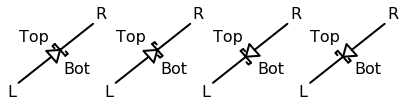

In [34]:
d = schemdraw.Drawing()
d.add(e.SCHOTTKY, theta=40, label='Top', botlabel='Bot', lftlabel='L', rgtlabel='R')
d.add(e.SCHOTTKY, theta=40, xy=[3,0], flip=True, label='Top', botlabel='Bot', lftlabel='L', rgtlabel='R')
d.add(e.SCHOTTKY, theta=40, xy=[6,0], reverse=True, label='Top', botlabel='Bot', lftlabel='L', rgtlabel='R')
d.add(e.SCHOTTKY, theta=40, xy=[9,0], flip=True, reverse=True, label='Top', botlabel='Bot', lftlabel='L', rgtlabel='R')
d.draw(showframe=False)

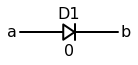

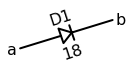

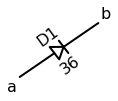

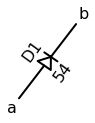

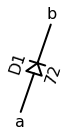

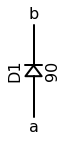

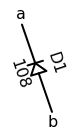

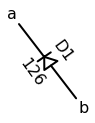

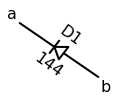

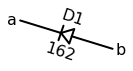

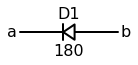

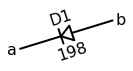

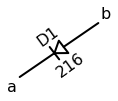

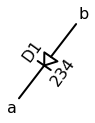

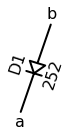

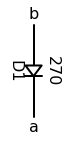

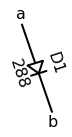

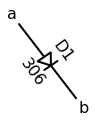

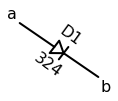

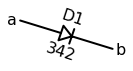

In [35]:
# lblrotate and add_label rotation parameter
div = 20
for i in range(div):
    th = (360./div) * i
    d = schemdraw.Drawing()
    R1 = d.add(e.DIODE, theta=th, label='D1', lblrotate=True)
    R1.add_label('%.0f'%th, loc='bot', rotation=th)
    R1.add_label('a', loc='lft')
    R1.add_label('b', loc='rgt')
    display(d.draw())
    

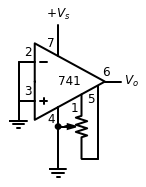

In [36]:
d = schemdraw.Drawing(fontsize=12)
op = d.add(e.OPAMP, label='741', lblloc='center', lblofst=0)
d.add(e.LINE, xy=op.in1, d='left', l=.5)
d.add(e.LINE, d='down', l=d.unit/2)
d.add(e.GND)
d.add(e.LINE, xy=op.in2, d='left', l=.5)
d.add(e.LINE, xy=op.out, d='right', l=.5, rgtlabel='$V_o$')
d.add(e.LINE, xy=op.vd, d='up', l=1, rgtlabel='$+V_s$')
trim = d.add(e.POT, xy=op.n1, d='down', flip=True, zoom=.7)
d.add(e.LINE, d='right', tox=op.n1a)
d.add(e.LINE, d='up', to=op.n1a)
d.add(e.LINE, d='left', xy=trim.tap, tox=op.vs)
d.add(e.DOT)
d.push()
d.add(e.LINE, d='down', l=d.unit/3)
d.add(e.GND)
d.pop()
d.add(e.LINE, d='up', toy=op.vs)    
op.add_label('1', loc='n1', size=9, ofst=[-.1, -.25], align=('right', 'top'))
op.add_label('5', loc='n1a', size=9, ofst=[-.1, -.25], align=('right', 'top'))
op.add_label('4', loc='vs', size=9, ofst=[-.1, -.2], align=('right', 'top'))
op.add_label('7', loc='vd', size=9, ofst=[-.1, .2], align=('right', 'bottom'))
op.add_label('2', loc='in1', size=9, ofst=[-.1, .1], align=('right', 'bottom'))
op.add_label('3', loc='in2', size=9, ofst=[-.1, .1], align=('right', 'bottom'))
op.add_label('6', loc='out', size=9, ofst=[-.1, .1], align=('left', 'bottom'))
d.draw()

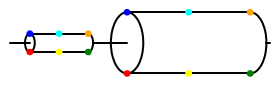

In [37]:
d = schemdraw.Drawing()
C = d.add(e.COAX)  # Default coax
d.add(e.DOT, xy=C.shieldstart, color='red')
d.add(e.DOT, xy=C.shieldend, color='green')
d.add(e.DOT, xy=C.shieldstart_top, color='blue')
d.add(e.DOT, xy=C.shieldend_top, color='orange')
d.add(e.DOT, xy=C.shieldcenter, color='yellow')
d.add(e.DOT, xy=C.shieldcenter_top, color='cyan')

C2 = d.add(e.coax(length=5, radius=1, xy=C.end))  # Custom coax
d.add(e.DOT, xy=C2.shieldstart, color='red')
d.add(e.DOT, xy=C2.shieldend, color='green')
d.add(e.DOT, xy=C2.shieldstart_top, color='blue')
d.add(e.DOT, xy=C2.shieldend_top, color='orange')
d.add(e.DOT, xy=C2.shieldcenter, color='yellow')
d.add(e.DOT, xy=C2.shieldcenter_top, color='cyan')

d.draw()

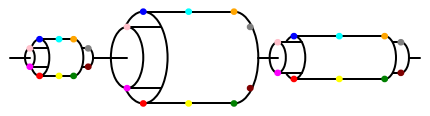

In [38]:
d = schemdraw.Drawing()
T = d.add(e.TRIAX)  # Default triax
d.add(e.DOT, xy=T.shieldstart, color='red')
d.add(e.DOT, xy=T.shieldend, color='green')
d.add(e.DOT, xy=T.shieldstart_top, color='blue')
d.add(e.DOT, xy=T.shieldend_top, color='orange')
d.add(e.DOT, xy=T.shieldcenter, color='yellow')
d.add(e.DOT, xy=T.shieldcenter_top, color='cyan')
d.add(e.DOT, xy=T.guardstart, color='magenta')
d.add(e.DOT, xy=T.guardend, color='maroon')
d.add(e.DOT, xy=T.guardstart_top, color='pink')
d.add(e.DOT, xy=T.guardend_top, color='gray')

# Custom triax - end is covered up
T2 = d.add(e.triax(length=5, radiusinner=1, radiusouter=1.5, 
                   shieldofststart=.5, shieldofstend=.5, xy=T.end))
d.add(e.DOT, xy=T2.shieldstart, color='red')
d.add(e.DOT, xy=T2.shieldend, color='green')
d.add(e.DOT, xy=T2.shieldstart_top, color='blue')
d.add(e.DOT, xy=T2.shieldend_top, color='orange')
d.add(e.DOT, xy=T2.shieldcenter, color='yellow')
d.add(e.DOT, xy=T2.shieldcenter_top, color='cyan')
d.add(e.DOT, xy=T2.guardstart, color='magenta')
d.add(e.DOT, xy=T2.guardend, color='maroon')
d.add(e.DOT, xy=T2.guardstart_top, color='pink')
d.add(e.DOT, xy=T2.guardend_top, color='gray')

# Custom triax - end is shown
T3 = d.add(e.triax(length=5, radiusinner=.5, radiusouter=.7, 
                   shieldofststart=.5, shieldofstend=.5, xy=T2.end))
d.add(e.DOT, xy=T3.shieldstart, color='red')
d.add(e.DOT, xy=T3.shieldend, color='green')
d.add(e.DOT, xy=T3.shieldstart_top, color='blue')
d.add(e.DOT, xy=T3.shieldend_top, color='orange')
d.add(e.DOT, xy=T3.shieldcenter, color='yellow')
d.add(e.DOT, xy=T3.shieldcenter_top, color='cyan')
d.add(e.DOT, xy=T3.guardstart, color='magenta')
d.add(e.DOT, xy=T3.guardend, color='maroon')
d.add(e.DOT, xy=T3.guardstart_top, color='pink')
d.add(e.DOT, xy=T3.guardend_top, color='gray')

d.draw()